In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

In [4]:
%store  -r acc_fc_ec_box_t850_pf
%store  -r acc_fc_ec_box_t850_cf
%store  -r acc_fc_ec_box_big_t850_pf
%store  -r acc_fc_ec_box_big_t850_cf
%store  -r acc_fc_ec_box_whole_t850_pf
%store  -r acc_fc_ec_box_whole_t850_cf

In [5]:
%store -r acc_fc_era_box_t850_pf
%store -r acc_fc_era_box_t850_cf
%store -r acc_fc_era_box_big_t850_pf
%store -r acc_fc_era_box_big_t850_cf
%store -r acc_fc_era_box_whole_t850_pf
%store -r acc_fc_era_box_whole_t850_cf

In [6]:
%store -r acc_ec_box_t850_pf
%store -r acc_ec_box_t850_cf
%store -r acc_ec_box_big_t850_pf
%store -r acc_ec_box_big_t850_cf
%store -r acc_ec_box_whole_t850_pf
%store -r acc_ec_box_whole_t850_cf

In [9]:
acc_fc_ec_box_t850_pf[14,:] = acc_ec_box_t850_pf[14,:]
acc_fc_ec_box_t850_cf[14] = acc_ec_box_t850_cf[14]
acc_fc_ec_box_big_t850_pf[14,:] = acc_ec_box_big_t850_pf[14,:]
acc_fc_ec_box_big_t850_cf[14] = acc_ec_box_big_t850_cf[14]
acc_fc_ec_box_whole_t850_pf[14,:]=  acc_ec_box_whole_t850_pf[14,:]     
acc_fc_ec_box_whole_t850_cf[14]=  acc_ec_box_whole_t850_cf[14]

In [12]:
acc_fc_era_box_t850_cf

array([-0.00346436, -0.06423832,  0.4251525 , -0.03691919,  0.66840141,
        0.03950802, -0.30290325, -0.26228162, -0.20021312,  0.83956004,
        0.87223597,  0.72512146,  0.46729078,  0.75237371,  0.72717332])

-1.0
0.0
1.0


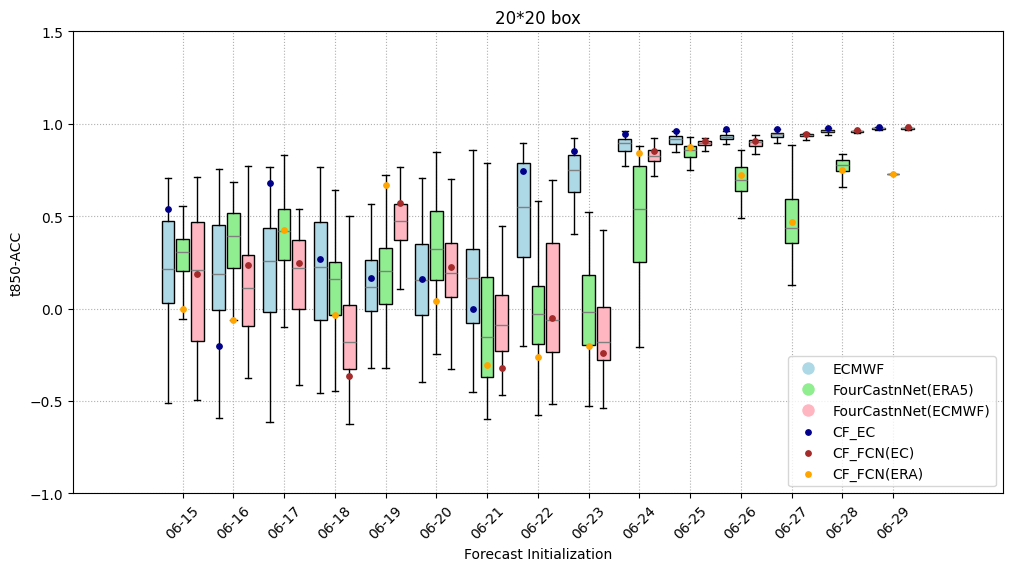

In [16]:

import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_t850_pf.T,acc_fc_era_box_t850_pf.T,acc_fc_ec_box_t850_pf.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box_t850_pf[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('t850-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_box_t850_cf,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_box_t850_cf,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_era_box_t850_cf,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)






legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.title('20*20 box')
plt.savefig('/home/kit/imk-tro/gj5173/19.10_plots/acc_t850_box.png', bbox_inches='tight',dpi=100)

#pl.show()

-1.0
0.0
1.0


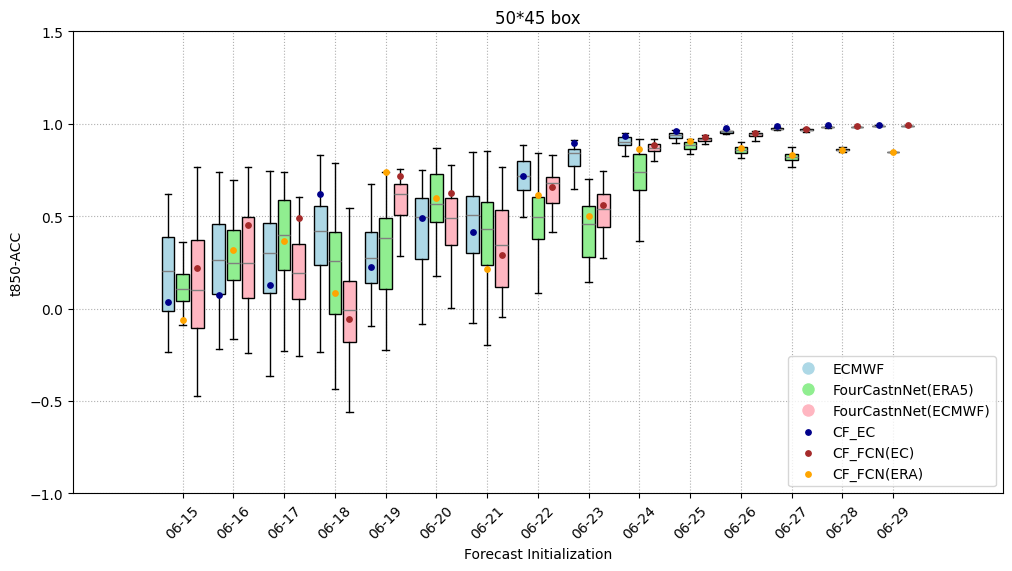

In [15]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_big_t850_pf.T,acc_fc_era_box_big_t850_pf.T,acc_fc_ec_box_big_t850_pf.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box_big_t850_pf[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('t850-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)

point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_box_big_t850_cf,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_box_big_t850_cf,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_era_box_big_t850_cf,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)
#acc_ec_box_big_t850_cf
ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.title('50*45 box')
plt.savefig('/home/kit/imk-tro/gj5173/19.10_plots/acc_t850_box_big.png', bbox_inches='tight',dpi=100)

#pl.show()

-1.0
0.0
1.0


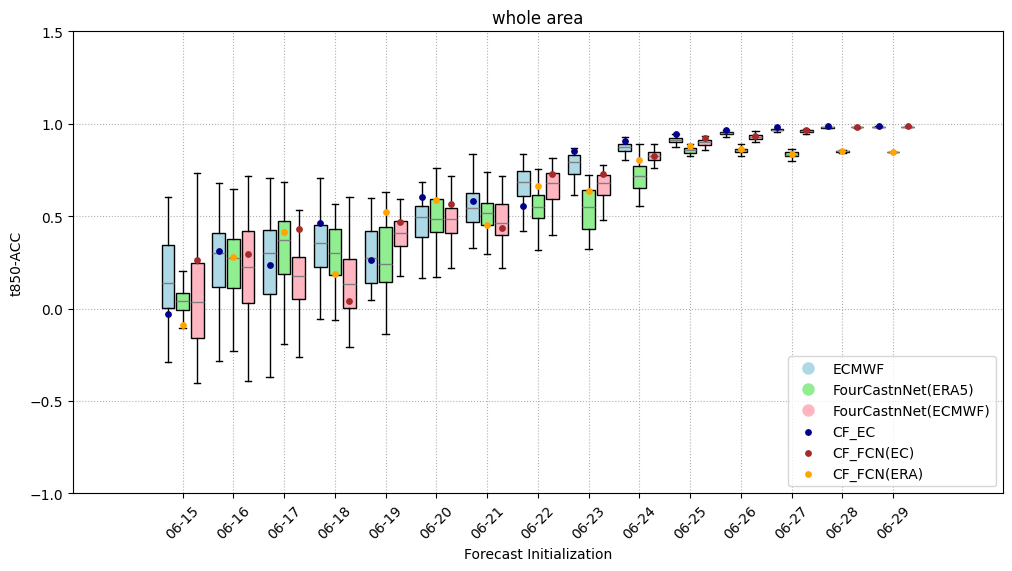

In [18]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_whole_t850_pf.T,acc_fc_era_box_whole_t850_pf.T,acc_fc_ec_box_whole_t850_pf.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box_whole_t850_pf[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('t850-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )

point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_box_whole_t850_cf,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_box_whole_t850_cf,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_era_box_whole_t850_cf,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)





legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.title('whole area')
plt.savefig('/home/kit/imk-tro/gj5173/19.10_plots/acc_t850_box_whole.png', bbox_inches='tight',dpi=100)

pl.show()

-1.0
0.0
1.0
-1.0
0.0
1.0
-1.0
0.0
1.0


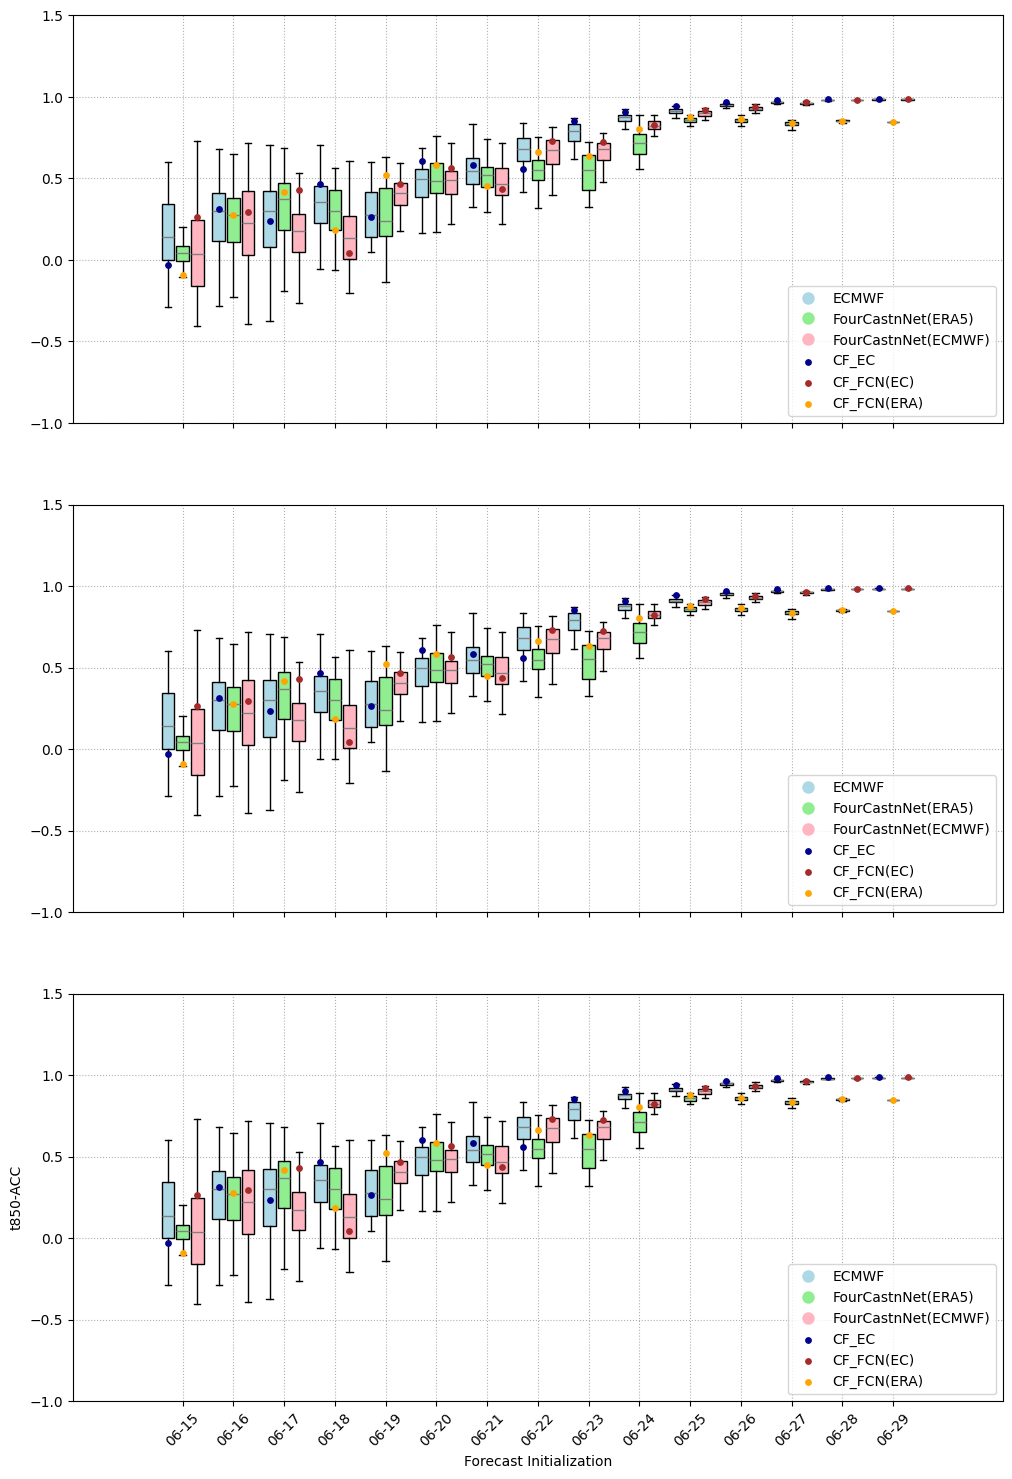

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True)


for idx, ax in enumerate(axes):

    data_groups = [acc_ec_box_whole_t850_pf.T,acc_fc_era_box_whole_t850_pf.T,acc_fc_ec_box_whole_t850_pf.T]
#np.shape(data_groups)


# --- Labels for your data:
    labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
    width       = 1/len(labels_list)
    width

    xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box_whole_t850_pf[:,:])) ]
    xlocations

    symbol      = 'r+'
    ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
    ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
    ymax 


    
    #ax = pl.gca()
    ax.set_ylim(-1,1.5)
    ax.grid(True, linestyle='dotted')
    ax.set_axisbelow(True)

    pl.xlabel('Forecast Initialization')
    pl.ylabel('t850-ACC')
#pl.title('title')

    space = len(data_groups)/2
    offset = len(data_groups)/2
    offset

    xlocations

# --- Offset the positions per group:

    group_positions = []
    for num, dg in enumerate(data_groups):    
        _off = (0 - space + (0.5+num))
        print(_off)
        group_positions.append([x+_off*(width+0.01) for x in xlocations])

    group_positions

    data_groups
    len(labels_list)

    for dg, pos, c in zip(data_groups, group_positions, colors):
        boxes = ax.boxplot(dg, 
                    sym=symbol,
                    labels=['']*len(labels_list),
    #            labels=labels_list,
                    positions=pos, 
                    widths=width, 
                    boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                    medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                    patch_artist=True,showfliers=False
                    )
    %store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


    ax.set_xticks( xlocations )
    ax.set_xticklabels( labels_list, rotation=45 )

    point_artists = []
    points_1 = ax.scatter(group_positions[0],acc_ec_box_whole_t850_cf,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
    points_2 = ax.scatter(group_positions[2],acc_fc_ec_box_whole_t850_cf,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
    points_3 = ax.scatter(group_positions[1],acc_fc_era_box_whole_t850_cf,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
    point_artists.append(points_1)
    point_artists.append(points_2)
    point_artists.append(points_3)





    legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
    legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
    ax.legend(handles=legend_handles, loc='lower right')
    #plt.title('whole area')

In [8]:
%store -r acc_fc_ec_cf_box
%store -r acc_fc_ec_cf_box_big
%store -r acc_fc_ec_cf_box_whole
%store -r acc_fc_ec_box
%store -r acc_fc_ec_box_big
%store -r acc_fc_ec_box_whole

(15, 50)

In [2]:
%store -r acc_fc_era_box_big
%store -r acc_fc_era_box_whole
%store -r acc_fc_era_box

In [3]:
acc_fc_era_cf_box_big= np.empty(15)
acc_fc_era_cf_box_whole= np.empty(15)
acc_fc_era_cf_box= np.empty(15)

In [4]:
acc_fc_era_cf_box_big=acc_fc_era_box_big[:,0]
acc_fc_era_cf_box_whole=acc_fc_era_box_whole[:,0]
acc_fc_era_cf_box=acc_fc_era_box[:,0]

In [5]:
%store  -r acc_fc_era_cf_box_big
%store  -r acc_fc_era_cf_box_whole
%store  -r acc_fc_era_cf_box

In [6]:
%store -r acc_ec_box
%store -r acc_ec_box_big
%store -r acc_ec_box_whole 
%store -r acc_ec_cf_box
%store -r acc_ec_cf_box_big
%store -r acc_ec_cf_box_whole  

In [9]:
acc_fc_ec_cf_box[14] = acc_ec_cf_box[14]
acc_fc_ec_cf_box_big[14] = acc_ec_cf_box_big[14]
acc_fc_ec_cf_box_whole[14] = acc_ec_cf_box_whole[14]

acc_fc_ec_box[14,:] = acc_ec_box[14,:]
acc_fc_ec_box_big[14,:] = acc_ec_box_big[14,:]
acc_fc_ec_box_whole[14,:] = acc_ec_box_whole[14,:]

-1.0
0.0
1.0


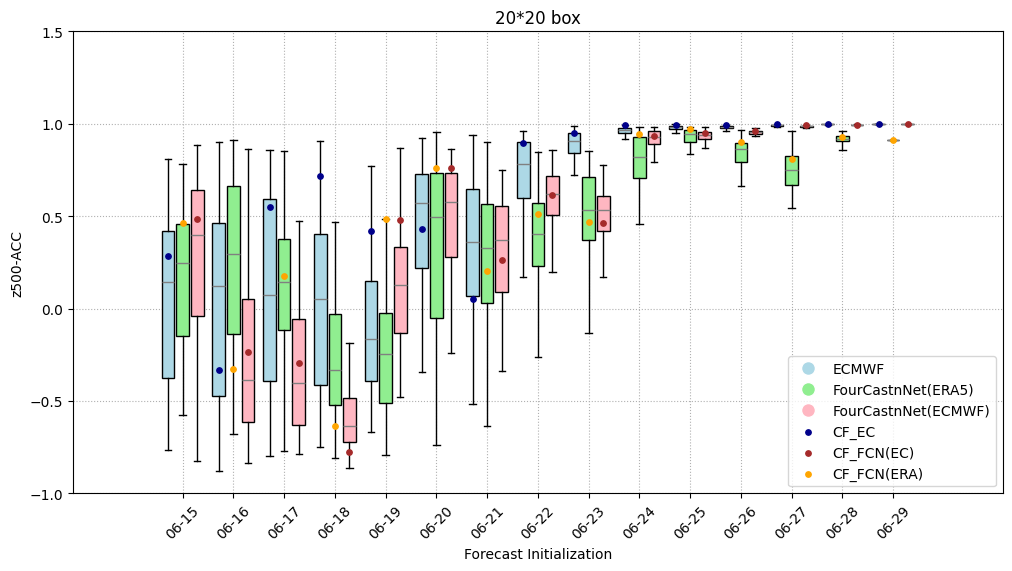

In [14]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box.T,acc_fc_era_box.T,acc_fc_ec_box.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_cf_box,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_cf_box,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_era_cf_box,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)






legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.title('20*20 box')
plt.savefig('/home/kit/imk-tro/gj5173/19.10_plots/acc_z500_box.png', bbox_inches='tight',dpi=100)

#pl.show()

-1.0
0.0
1.0


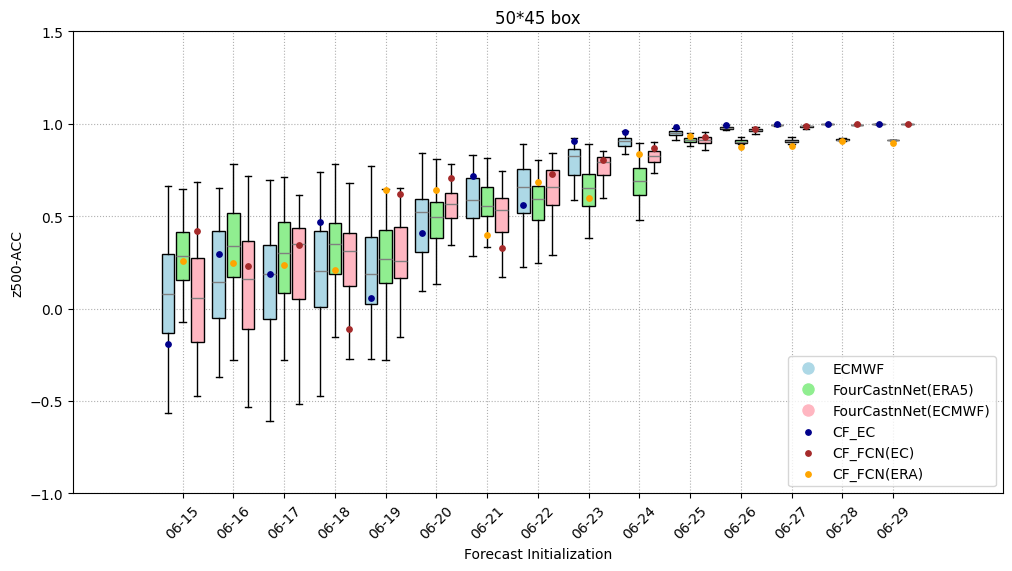

In [15]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_whole.T,acc_fc_era_box_whole.T,acc_fc_ec_box_whole.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box_whole[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_cf_box_big,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_cf_box_big,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_era_cf_box_big,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)






legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.title('50*45 box')
plt.savefig('/home/kit/imk-tro/gj5173/19.10_plots/acc_z500_box_big.png', bbox_inches='tight',dpi=100)

#pl.show()

-1.0
0.0
1.0


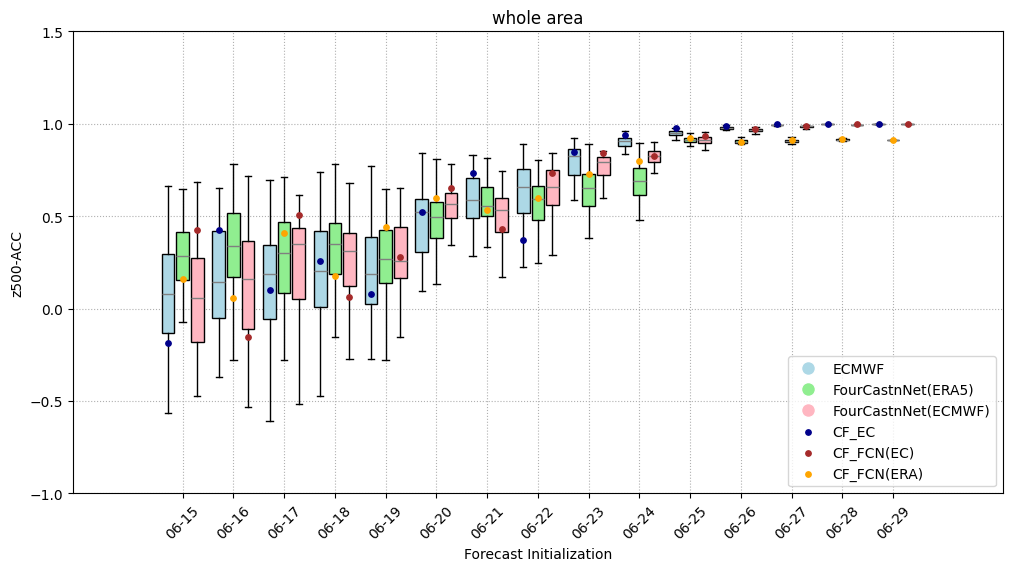

In [16]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_whole.T,acc_fc_era_box_whole.T,acc_fc_ec_box_whole.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box_whole[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


point_artists = []
points_1 = ax.scatter(group_positions[0],acc_ec_cf_box_whole,color='darkblue',zorder = 5,s =15,label = 'CF_EC')
points_2 = ax.scatter(group_positions[2],acc_fc_ec_cf_box_whole,color='brown',zorder = 5,s =15,label = 'CF_FCN(EC)')
points_3 = ax.scatter(group_positions[1],acc_fc_era_cf_box_whole,color='orange',zorder = 5,s =15,label = 'CF_FCN(ERA)')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)






legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]+ point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.title('whole area')
plt.savefig('/home/kit/imk-tro/gj5173/19.10_plots/acc_z500_box_whole.png', bbox_inches='tight',dpi=100)

#pl.show()